 # Introduction to Computer Vision - Fall 2025

# Assignment 2

**Grading Criteria:**

Task1: 30%

Task2: 35%

Task3: 35%


**Notes**

Non working code is 0 - no matter what is writtern in the code

Student must solve the question using the required method mentioned in that question. For example, if the question asks to use "connected components" and the student solved it with another method he/she will get 0 for that question.

----------
Code should be well documented (explain your logic)

Plagiarism in code -> 0

AI generated code -> 0

Late submission 5% per day

Submit your completed Colab notebook.



download images

In [ ]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math

!wget "https://drive.google.com/uc?export=download&id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6" -O cnt_img.jpg
!wget "https://drive.google.com/uc?export=download&id=1Fye6-JjZjibczcqZ2cDT4o5gElUxFvIU" -O scene.jpg
!wget "https://drive.google.com/uc?export=download&id=1CSI5FFyfFoXzM86v-Z0n2h3CsyGzpHSU" -O book.jpg
!wget "https://drive.google.com/uc?export=download&id=1rjNwi4q7RNmoRm175diQyvciHDoCrMPv" -O final_template.jpg
!wget "https://drive.google.com/uc?export=download&id=1V71Pr8lcT8KPW7aZecBpFoyROsUK9y7F" -O classes.jpg
!wget "https://drive.google.com/uc?export=download&id=19kwYwa1Rm-BNkKHwuJle4Rx7zB-23mE9" -O blocks.jpg
!wget "https://drive.google.com/uc?export=download&id=1AIPZKJa-mZPAcMGPF-d5AqEHx2GkvGji" -O blocks_labeld.jpg

--2025-09-29 19:36:36--  https://drive.google.com/uc?export=download&id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6
Resolving drive.google.com (drive.google.com)... 74.125.20.102, 74.125.20.139, 74.125.20.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6&export=download [following]
--2025-09-29 19:36:36--  https://drive.usercontent.google.com/download?id=1PwD1z2-6g09UdnYg5gDCT_KuoJVLEIJ6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50541 (49K) [image/jpeg]
Saving to: ‘cnt_img.jpg’

cnt_img.jpg         100%[===================>]  49.36K  --.-KB/s    in 0.001s  

2025-

Helper functions - it is optional to use them

In [ ]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])

    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Task 1: Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



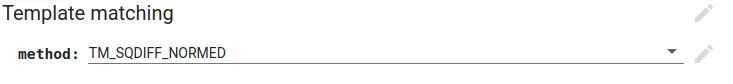

The output should be like follow:

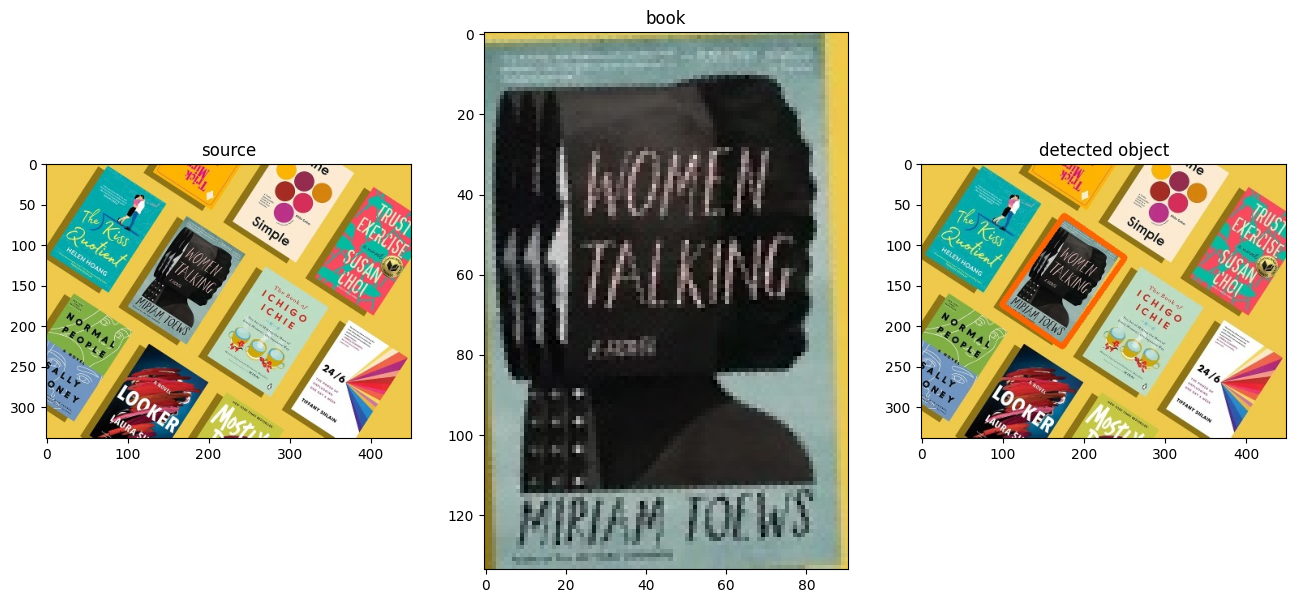

In [ ]:
# DO NOT change these codes
scene = cv2.imread("scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("book.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
final = cv2.imread("final_template.jpg")
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book, final],["source",  "book", "detected object"])

### Solution

### **Methodology**

1. **Pick a metric.** `method` maps to an OpenCV flag for `cv2.matchTemplate`.

  * For `TM_SQDIFF(_NORMED)`: **smaller = better**.
  * For the others (`CCOEFF`, `CCORR`, `*_NORMED`): **larger = better**.

2. **Slide the template over the image.**
  `res = matchTemplate(scene, book, m)` computes a **response map** where each value is the similarity between `book` placed at that position and `scene`.
  Shape of `res` is `(H-h+1, W-w+1)` where `(H,W)` is `scene`, `(h,w)` is `book`.

3. **Pick the best location.**

  * If "smaller is better" → `argmin(res)`; else → `argmax(res)`.
  * Convert flat index → 2D coords: `y, x = unravel_index(...)`.
  * That `(x,y)` is the **top-left corner** where the template matches best.
  * `score = res[y,x]` is the best similarity value.

4. **Draw the detection.**
  Knowing the template size `(h,w)`, draw a red rectangle at `(x,y,w,h)` on `scene`.



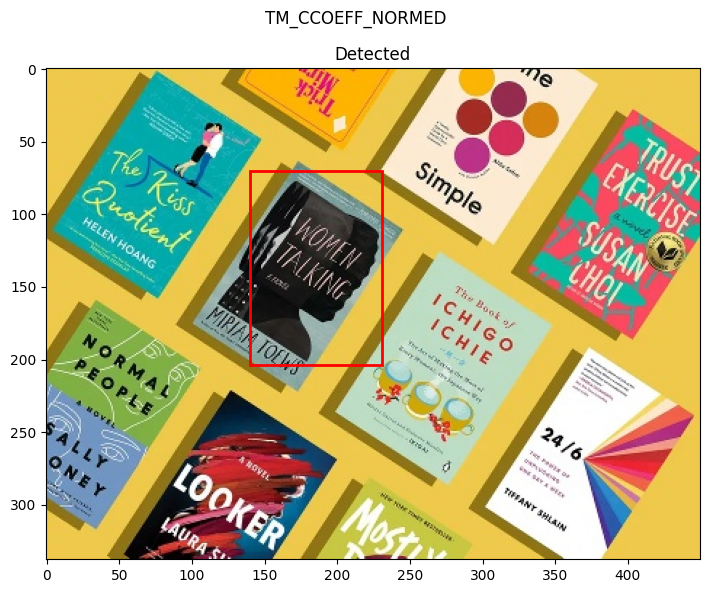

In [ ]:
from matplotlib.patches import Rectangle

# Choosing the method for cv2.matchTemplate (TM_CCOEFF_NORMED works better for this task)
method = "TM_CCOEFF_NORMED"  #@param ['CHOOSE_TYPE','TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
mmap = {
  'TM_CCOEFF': cv2.TM_CCOEFF,
  'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
  'TM_CCORR': cv2.TM_CCORR,
  'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
  'TM_SQDIFF': cv2.TM_SQDIFF,
  'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
}
if method not in mmap:
  raise TypeError("Wrong method. Please, choose correct method")
prefer_min = method in ('TM_SQDIFF', 'TM_SQDIFF_NORMED')
m = mmap[method]

# Match template with choosen method
res = cv2.matchTemplate(scene, book, m)

# Same as cv2.minMaxLoc, choose correct value for the method
flat_idx = np.argmin(res) if prefer_min else np.argmax(res)
y, x = np.unravel_index(flat_idx, res.shape)   # (row, col)
score = res[y, x]
top_left = (x, y)

# Plot the photo
h, w = book.shape[:2]
plt.figure(figsize=(8,6))
plt.title('Detected')
plt.imshow(scene)
ax = plt.gca()
ax.add_patch(Rectangle((top_left[0], top_left[1]), w, h, fill=False, edgecolor='red', linewidth=2))
plt.suptitle(method)
plt.tight_layout()
plt.show()

1. **Pick the matching metric**

  * Map the string (e.g. `"TM_CCOEFF_NORMED"`) to OpenCV's flag.
  * Decide if we're looking for a **min** (SQDIFF) or a **max** (others).

2. **Work in grayscale**

  * Convert both `scene` and `book` to gray for speed and robustness.

3. **Coarse rotation search**

  * Spin the template every 10° from 0..350°.
  * For each angle: rotate → match → keep the best score/location/template seen so far.

4. **Fine rotation search around the winner**

  * Scan a small ±20° window with 1° steps around the best coarse angle.
  * Update best score/location/template if improved.

5. **Report best match**

  * Print the winning angle, score, and top-left match location.

6. **Draw the rotated box on the scene**

  * Build the template's rectangle, rotate it by the best angle, and translate by the match location.
  * Draw the rotated polygon on a copy of the scene.

7. **Show results**

  * Left: original scene.
  * Middle: the template rotated to the coarse best angle (for reference).
  * Right: detection with the rotated box.

8. **Plot score vs. angle**

  * Blue curve: coarse scores per 10°.
  * Orange curve: fine scores in the ±20° window.
  * Helps visualize why the chosen angle is the winner.


Best angle: 325.0° | score: 0.5395162105560303 | loc: (129, 77)


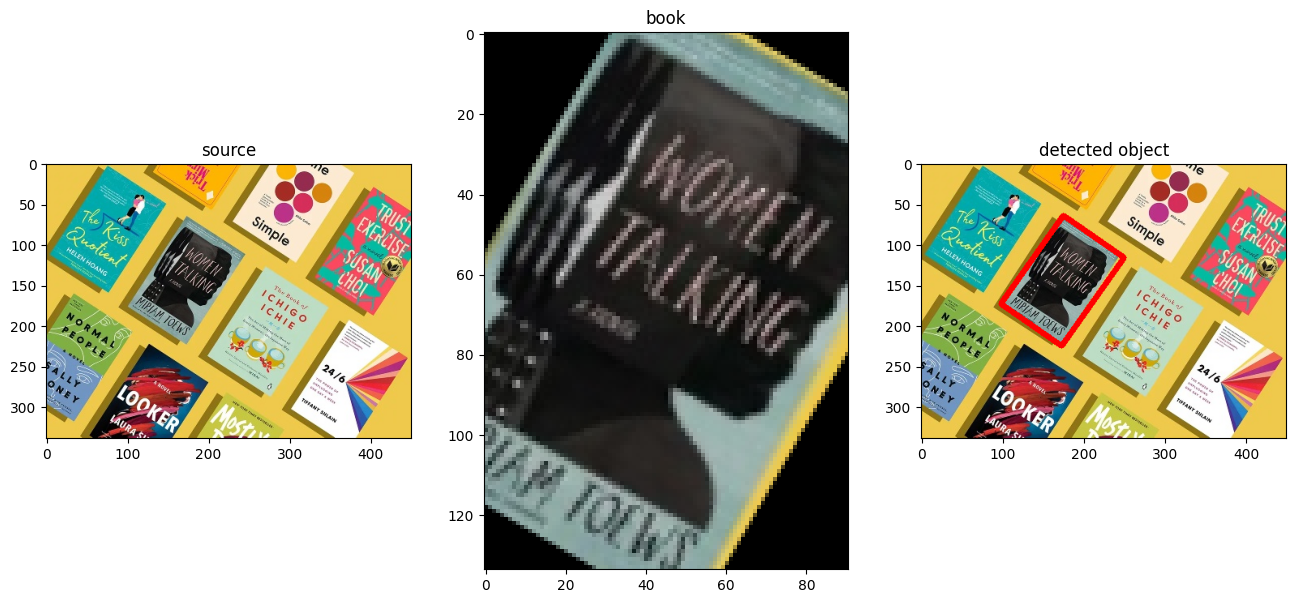

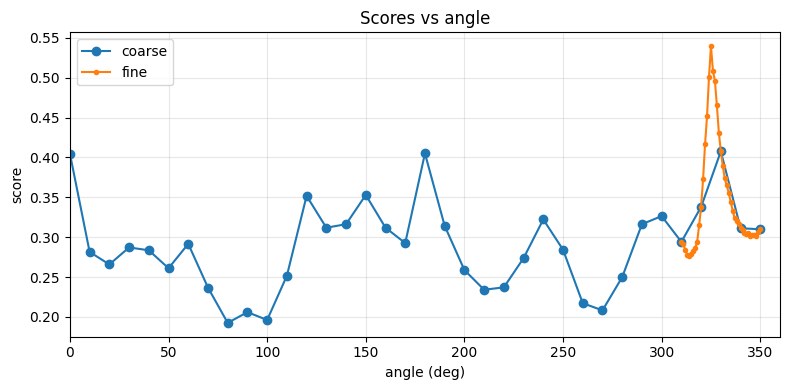

In [ ]:
#@title SUPER ADVANCED Template matching {run: "auto", display-mode:"form"}

#Choosing the method for cv2.matchTemplate (TM_CCOEFF_NORMED works better for this task)
method = "TM_CCOEFF_NORMED" #@param ['CHOOSE_TYPE','TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
mmap = {
  'TM_CCOEFF': cv2.TM_CCOEFF,
  'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
  'TM_CCORR': cv2.TM_CCORR,
  'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
  'TM_SQDIFF': cv2.TM_SQDIFF,
  'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
}
if method not in mmap:
  raise TypeError("Wrong method. Please, choose correct method")
prefer_min = method in ('TM_SQDIFF', 'TM_SQDIFF_NORMED')
method = mmap[method]

# We will rotate image very often, so this is a function to make it easier
def rotate_image(img, angle):
  h, w = img.shape[:2]
  M = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
  return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR,
                        borderMode=cv2.BORDER_CONSTANT, borderValue=0)

# Depending on method we might need different extremum, so this function is the generalisation tool
def better(a, b):
  return (a < b) if prefer_min else (a > b)

# Matching images and returns the values we need the most depending on method
def match_image(img, tmpl):
  res = cv2.matchTemplate(img, tmpl, method)
  mn, mx, mnl, mxl = cv2.minMaxLoc(res)
  return (mn, mnl) if prefer_min else (mx, mxl)

# Working in gray will be a bit easier and faster than in RGB
scene_gray = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
book_gray  = cv2.cvtColor(book,  cv2.COLOR_BGR2GRAY)
# Map to save best data
best = {
  'score': (np.inf if prefer_min else -np.inf),
  'angle': 0, 'loc': (0,0), 'templ': book_gray
}

# For first loop we look for match with a big step
# so we can find the area with better value faster
# because exact angle is unknown
angles = [i for i in range(0, 360, 10)]
coarse_scores = []
for ang in angles:
  rt = rotate_image(book_gray, ang)
  sc, loc = match_image(scene_gray, rt)
  coarse_scores.append(sc)
  if better(sc, best['score']):
    best.update(score=sc, angle=ang, loc=loc, templ=rt)

# Second loop for tuning
# Using small step to make borders as close as possible
fine_angles, fine_scores = [], []
fine_best = best.copy()
for d in range(-20, 21):
  ang = (best['angle'] + d) % 360
  rt = rotate_image(book_gray, ang)
  sc, loc = match_image(scene_gray, rt)
  fine_angles.append(ang); fine_scores.append(sc)
  if better(sc, fine_best['score']):
    fine_best.update(score=sc, angle=ang, loc=loc, templ=rt)

print(f"Best angle: {fine_best['angle']:.1f}° | score: {fine_best['score']} | loc: {fine_best['loc']}")

# Draw a box
x, y = fine_best['loc']
th, tw = fine_best['templ'].shape[:2]
box = np.array([[0,0],[tw,0],[tw,th],[0,th]], np.float32).reshape(-1,1,2)
M = cv2.getRotationMatrix2D((tw/2.0, th/2.0), fine_best['angle'], 1.0)
box_on_scene = (cv2.transform(box, M).reshape(-1,2) + np.array([x,y])).astype(int)
final = scene.copy()
cv2.polylines(final, [box_on_scene], True, (255,0,0), 5)

# Show the results
showInRow([scene, rotate_image(book, best['angle']), final],
          ["source","book","detected object"])

# Show angle and score dependency
plt.figure(figsize=(8,4))
plt.title("Scores vs angle")
plt.plot(angles, coarse_scores, 'o-', label='coarse')
if fine_scores:
  idx = np.argsort(fine_angles)
  plt.plot(np.array(fine_angles)[idx], np.array(fine_scores)[idx], '.-', label='fine')
plt.xlim(0, 360); plt.xlabel("angle (deg)"); plt.ylabel("score")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


## Task 2: Classify objects using Contour features

for the following image, extract the numbre of the object, the contour of each object, then classify the objects based on their shapes and write the class number on each object as follows

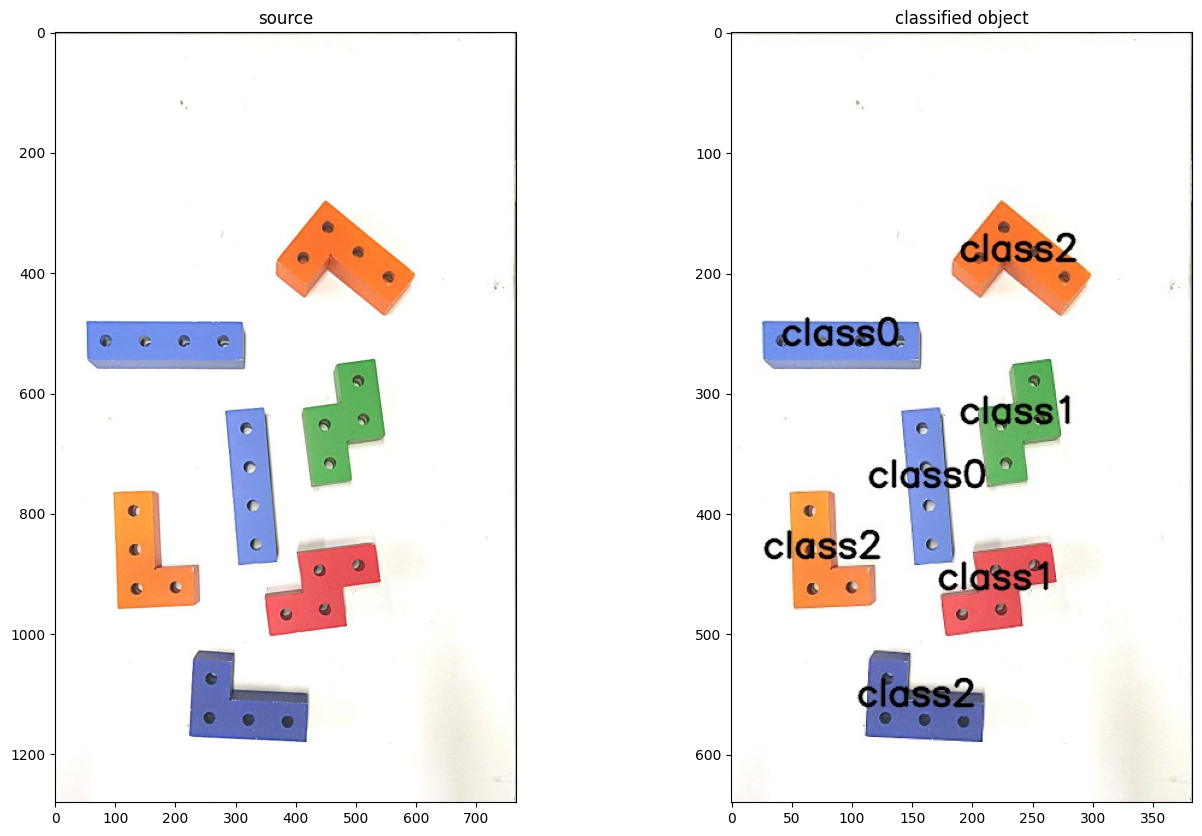

In [ ]:
# DO NOT change these codes
cnt_img = cv2.imread("cnt_img.jpg")
cnt_img = cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB)
classes = cv2.imread("classes.jpg")
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2RGB)
showInRow([cnt_img, classes],["source", "classified object"])

### Solutions (Hard and correct ones)

1. **Crop & clean background**

   * Take a working ROI: `img = cnt_img[200:,:700,:]`.
   * Set "almost white" pixels (all channels ≥ `WHITE_T`) to black so the background won't become objects.

2. **Preprocess for object extraction**

   * Convert to grayscale → `gray`.
   * Smooth noise with Gaussian blur → `blur`.

3. **Find candidate objects**

   * Extract **external** contours from the preprocessed image: `findContours(..., RETR_EXTERNAL, ...)`.
   * For each contour, skip tiny ones (`area < MIN_AREA`).
   * Get its bounding box `(x,y,w,h)`.
   * Cut a patch from `blur`, equalize it (`equalizeHist`), and paste into a **square canvas** (pad to `s=max(w,h)`); this keeps content scale and centers it.
   * Save the square patch and its box.

4. **Template-matching similarity (pairwise)**

   * Choose matching metric (`TM_CCOEFF_NORMED` here). For this metric: **higher score = more similar** (`prefer_min=False`).
   * Define `match_image(img, tmpl)` → runs `matchTemplate`, returns the best score and location.
   * Define `rotate_image` to rotate patches around center.

5. **Rotation/flips search for best match**

   * `best_sim_with_rotation(A,B)` compares patch `B` to `A` under:

     * four flip modes: none, horizontal, vertical, both;
     * coarse angle sweep (0..360 by `COARSE_STEP`), then fine refinement around the best angle (±`FINE_WIN` by `FINE_STEP`).
   * At each pose: rotate `B`, match against `A`, convert score to “bigger is better” (only needed if `prefer_min` were true), keep the best.

6. **Build the similarity matrix `S`**

   * For every pair `(i,j)`, compute `s1 = best_sim(i,j)` and `s2 = best_sim(j,i)` and store `S[i,j] = S[j,i] = max(s1,s2)` to make it symmetric.

7. **Cluster similar objects**

   * Start each object in its own set.
   * For each pair `(i,j)`, if `S[i,j] ≥ SIM_THRESH`, union them.
   * Map root IDs to compact class labels `0..K-1`.
   * `labels[i]` is the class for object `i`.

8. **Visualize**

   * Draw thin contours of kept objects on a copy of `img`.
   * For each object's bbox, draw a colored rectangle and write `classN`.
   * Plot the similarity heatmap `S` (0..1) for threshold tuning.
   * Print class counts.


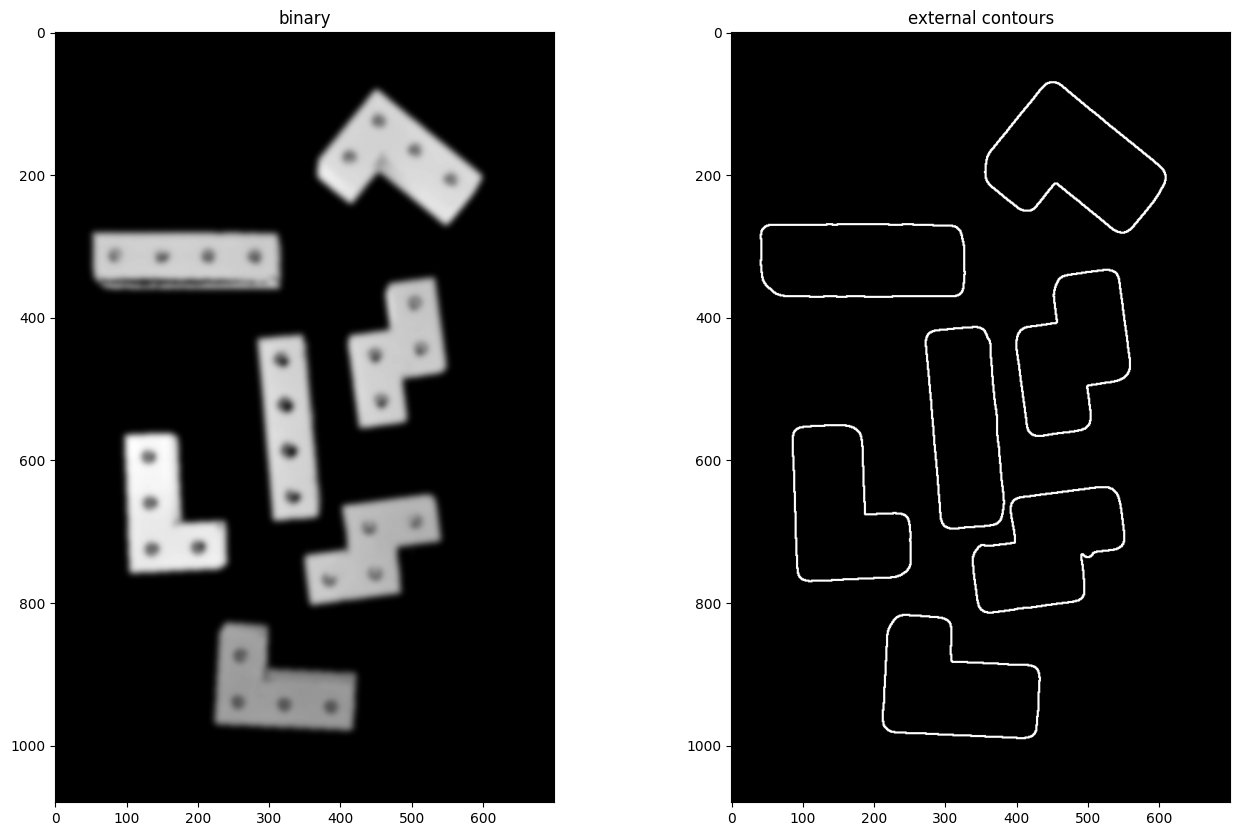

objects: 7
kept objects: 7
classes: 3 | counts: {'class0': 3, 'class1': 2, 'class2': 2}


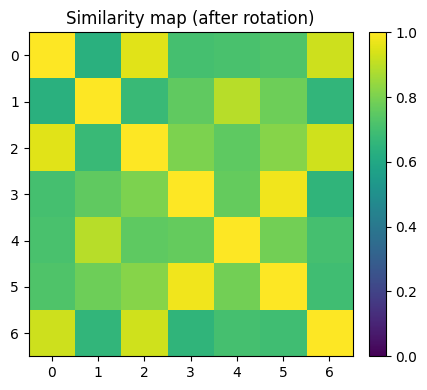

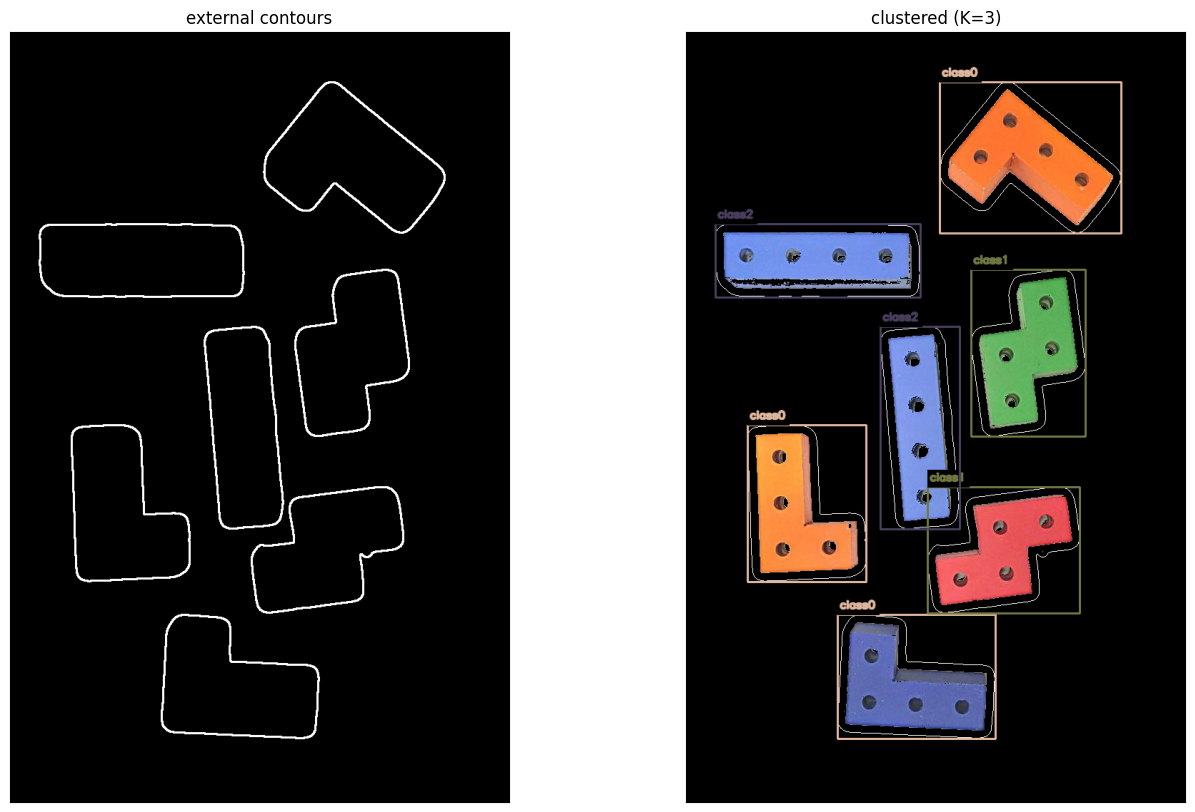

In [31]:
img = cnt_img[200:,:700,:].copy() # a bit of cutting

# background filter
WHITE_T=150
bg = (img[...,0] >= WHITE_T) & (img[...,1] >= WHITE_T) & (img[...,2] >= WHITE_T)
img[bg] = 0

# transform gray and blur
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (27,27), 0)

# find contours
cnts, _ = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw them
outer = np.zeros_like(blur)
cv2.drawContours(outer, cnts, -1, 255, 2)

showInRow([blur, outer], ["binary", "external contours"])
print("objects:", len(cnts))

method = "TM_CCOEFF_NORMED" #@param ['CHOOSE_TYPE','TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
mmap = {
  'TM_CCOEFF': cv2.TM_CCOEFF,
  'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
  'TM_CCORR': cv2.TM_CCORR,
  'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
  'TM_SQDIFF': cv2.TM_SQDIFF,
  'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
}
if method not in mmap:
  raise TypeError("Wrong method. Please, choose correct method")
prefer_min = method in ('TM_SQDIFF', 'TM_SQDIFF_NORMED')
method = mmap[method]

# We will rotate image very often, so this is a function to make it easier
def rotate_image(img, angle):
  h, w = img.shape[:2]
  M = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)
  return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR,
                        borderMode=cv2.BORDER_CONSTANT, borderValue=0)

# Matching images and returns the values we need the most depending on method
def match_image(img, tmpl):
  res = cv2.matchTemplate(img, tmpl, method)
  mn, mx, mnl, mxl = cv2.minMaxLoc(res)
  return (mn, mnl) if prefer_min else (mx, mxl)

# Hyper parameters
MIN_AREA    = 150
SIM_THRESH  = 0.82
COARSE_STEP = 15
FINE_WIN    = 20
FINE_STEP   = 1

patches = []
boxes   = []
keep_cnts = []

# choose only these contours which are big enough
for c in cnts:
    area = cv2.contourArea(c)
    if area < MIN_AREA: continue
    x,y,w,h = cv2.boundingRect(c)
    p = blur[y:y+h, x:x+w]
    if p.size == 0: continue
    p = cv2.equalizeHist(p)
    s = max(h, w)
    pad_y = (s - h)//2; pad_x = (s - w)//2
    sq = np.zeros((s, s), dtype=np.uint8)
    sq[pad_y:pad_y+h, pad_x:pad_x+w] = p
    patches.append(sq)
    boxes.append((x,y,w,h))
    keep_cnts.append(c)

n = len(patches)
print(f"kept objects: {n}")

# via flipping and rotation find best correlation
def best_sim_with_rotation(A, B):

    best_raw = -np.inf
    best_ang = 0

    for flip in (None, 1, 0, -1):
        Bf = B if flip is None else cv2.flip(B, flip)

        loc_best = best_raw
        loc_ang  = 0
        for ang in range(0, 360, COARSE_STEP):
            rB = rotate_image(Bf, ang)
            raw, _ = match_image(A, rB)
            sc = -raw if prefer_min else raw
            if sc > loc_best:
                loc_best, loc_ang = sc, ang

        for d in range(-FINE_WIN, FINE_WIN + 1, FINE_STEP):
            ang = (loc_ang + d) % 360
            rB = rotate_image(Bf, ang)
            raw, _ = match_image(A, rB)
            sc = -raw if prefer_min else raw
            if sc > loc_best:
                loc_best, loc_ang = sc, ang

        if loc_best > best_raw:
            best_raw, best_ang = loc_best, loc_ang

    return best_raw

# correlation matrix
S = np.eye(n, dtype=np.float32)
for i in range(n):
    for j in range(i+1, n):
        s1 = best_sim_with_rotation(patches[i], patches[j])
        s2 = best_sim_with_rotation(patches[j], patches[i])
        s  = max(s1, s2)
        S[i,j] = S[j,i] = s

# union–find to cluster by similarity threshold
parent = list(range(n))
def find(a):
    while parent[a] != a:
        parent[a] = parent[parent[a]]
        a = parent[a]
    return a
def unite(a,b):
    ra, rb = find(a), find(b)
    if ra != rb:
        parent[rb] = ra

for i in range(n):
    for j in range(i+1, n):
        if S[i,j] >= SIM_THRESH:
            unite(i,j)

roots = {find(i) for i in range(n)}
root2lab = {r:k for k, r in enumerate(sorted(roots))}
labels = [root2lab[find(i)] for i in range(n)]
K = max(labels)+1 if labels else 0
print(f"classes: {K} | counts:", {f"class{k}": labels.count(k) for k in range(K)})

# visualize
vis = img.copy()
rng = np.random.default_rng(0)
palette = (rng.integers(60,255,(max(1,K),3))).tolist()

cv2.drawContours(vis, keep_cnts, -1, (255,255,255), 1)

for (x,y,w,h), lab in zip(boxes, labels):
    color = tuple(int(c) for c in palette[lab])
    cv2.rectangle(vis, (x,y), (x+w,y+h), color, 2)
    name = f"class{lab}"
    font, scale, th = cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
    (tx, ty), base = cv2.getTextSize(name, font, scale, th)
    pad = 3
    bx0, by0 = x, max(0, y - ty - base - 2*pad)
    bx1, by1 = x + tx + 2*pad, y
    cv2.rectangle(vis, (bx0,by0), (bx1,by1), (0,0,0), -1)
    cv2.putText(vis, name, (x+pad, y-base-pad), font, scale, color, th, cv2.LINE_AA)

plt.figure(figsize=(4.8,4))
plt.title("Similarity map (after rotation)")
plt.imshow(S, vmin=0, vmax=1, cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks(range(n)); plt.yticks(range(n))
plt.tight_layout(); plt.show()

showInRow([outer, vis], ["external contours", f"clustered (K={K})"], disable_ticks=True)


1. **Crop the working area**
   Cut away empty margins so later steps run faster and aren't biased by irrelevant background.

2. **Background removal**
   Mark pixels that are “almost white” (all R,G,B ≥ `WHITE_T`) and set them to black, so the background won't form objects.

3. **Grayscale → blur → binary**
   * Convert to gray (simplifies processing).
   * Gaussian blur (reduces speckle and small gaps).
   * Otsu threshold → a clean **binary** mask (objects = white, background = black).

4. **Find outer contours**
   `cv2.findContours(..., RETR_EXTERNAL, ...)` extracts only **top-level** object contours (ignores holes/inner edges).

5. **Approximate contours by polygons**
   For each contour `c`:

   * Compute perimeter `peri`.
   * `approxPolyDP(c, 0.02*peri, True)` simplifies the contour to a polygon.
   * `v = len(approx)` = number of corners → our **shape class**.

6. **Count & store classes**

   * `class_counts[v]` counts how many shapes have `v` corners.
   * `class_members[v]` stores indices of contours in that class.
   * `cont_classes[idx]` maps each contour index to its class (`v`).

7. **Draw results**

   * Draw each approximated polygon on a copy of the image.
   * Compute a label position (centroid via image moments; fallback to bbox center).
   * Put text `"class{v}"` at the centroid in white.

8. **Display & summary**

   * Show the annotated image.
   * Print a sorted dictionary: **vertices → count** (e.g., `{3: 2, 4: 5, 5: 1}`).


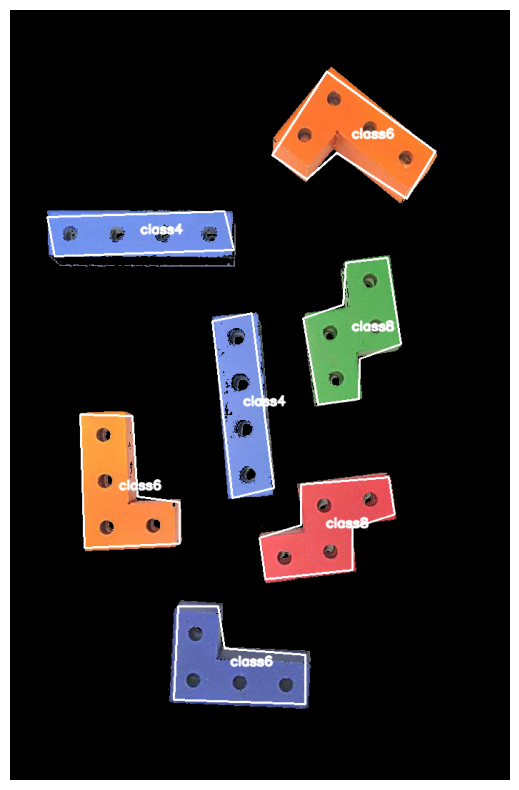

Class counts (vertices -> count): {4: 2, 6: 3, 8: 2}


In [137]:
# A bit after solving task with approach above i remember corner detection...
# So here it is
from collections import defaultdict

# a bit of cutting to get rid of useless space
img = cnt_img[200:,:700,:].copy()

#background filtration
WHITE_T=135
bg = (img[...,0] >= WHITE_T) & (img[...,1] >= WHITE_T) & (img[...,2] >= WHITE_T)
img[bg] = 0

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# blur the noise
blur = cv2.GaussianBlur(gray, (49,31), 0)
# make it binary
_, bw = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# find contours of figures
cnts, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
class_counts  = defaultdict(int)        # {v: count}
class_members = defaultdict(list)       # {v: [contour_idx]}
cont_classes  = {}                      # {contour_idx: v}

# count and draw shapes
# same shape == same number of corners
out = img.copy()
for idx, c in enumerate(cnts):

    # get corners
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    v = len(approx)

    # count same classes
    class_counts[v]  += 1
    class_members[v].append(idx)
    cont_classes[idx] = v

    # draw a contur and write "class v"
    poly = approx.reshape(-1,2)
    cv2.polylines(out, [poly], True, (255,255,255), 2)

    M = cv2.moments(c)
    if M['m00'] != 0:
        cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00'])
    else:
        x,y,w,h = cv2.boundingRect(c); cx, cy = x+w//2, y+h//2

    cv2.putText(out, f"class{v}", (cx, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2, cv2.LINE_AA)
# show the result
plt.imshow(out); plt.axis('off'); plt.show()

summary = {v: class_counts[v] for v in sorted(class_counts)}
print("Class counts (vertices -> count):", summary)

## Task 3: Count objects in image

Using only connected components to segment the objects in this image

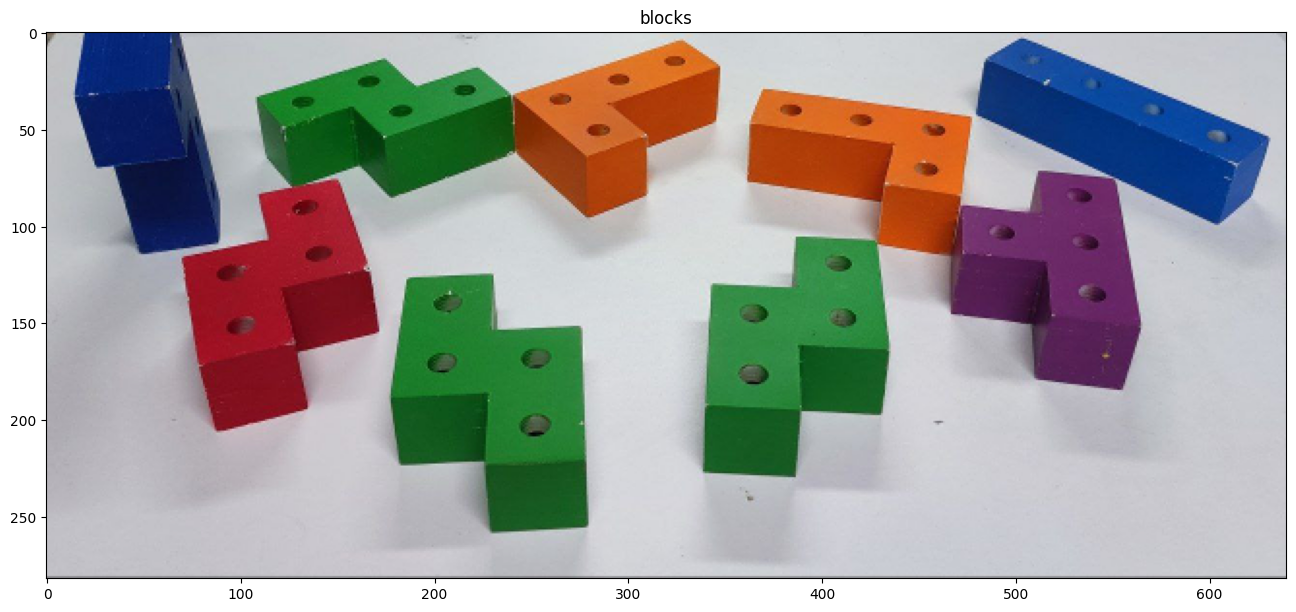

In [ ]:
# DO NOT change these codes
blocks = read_and_resize("blocks.jpg")
showInRow([blocks],["blocks"])

The output should be like this

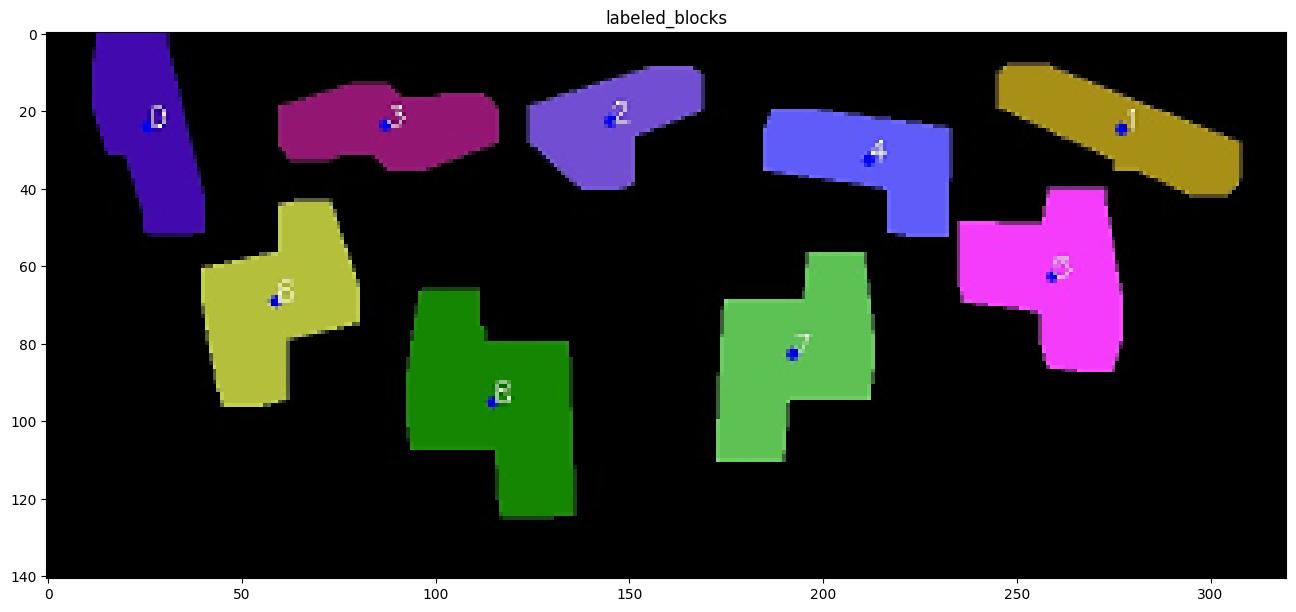

In [ ]:
# DO NOT change these codes
labeled_blocks = read_and_resize("blocks_labeld.jpg")
showInRow([labeled_blocks],["labeled_blocks"])

1. **Copy & background removal**
   Duplicate the image and set "almost white" pixels (>= `WHITE_T` in all RGB channels) to black so the background won't create components.

2. **Split channels**
   Extract R, G, B as separate 2-D `uint8` arrays. Processing per channel simplifies color-based segmentation.

3. **Denoise each channel**
   Apply Gaussian blur (different kernel sizes per channel) to suppress speckle/noise and smooth small gaps.

4. **Intensity thresholding**
   For each channel, convert to a **binary mask** (0/255) by thresholding: keep pixels with sufficiently high intensity (e.g., R>=150, G>=120, B>=100). This yields three masks: likely-red, likely-green, likely-blue regions.

5. **Initialize result canvas**
   Start a blank RGB canvas (all zeros) to paint labeled components; set up a random generator and an index counter.

6. **Connected components per mask**
   For each binary mask, run `cv2.connectedComponentsWithStats(mask, connectivity=8)` to split it into distinct objects and retrieve:

   * `labels`: per-pixel component IDs,
   * `stats`: bounding box and area for each component,
   * `cents`: component centroids.

7. **Filter small objects**
   Skip components with area `< MIN_AREA` to remove tiny blobs/noise.

8. **Colorize components**
   For each kept component, assign a random RGB color and fill all pixels with that color on `canvas` using a boolean index `canvas[labels==i] = color`.

9. **Place numeric labels**
   Compute the centroid `(cx, cy)` from `cents[i]` and draw a **white** index number at that location with `cv2.putText`.

10. **Display results**
    Show per-channel binary masks for debugging, print the total count, and display the final colored `canvas` with numbers.




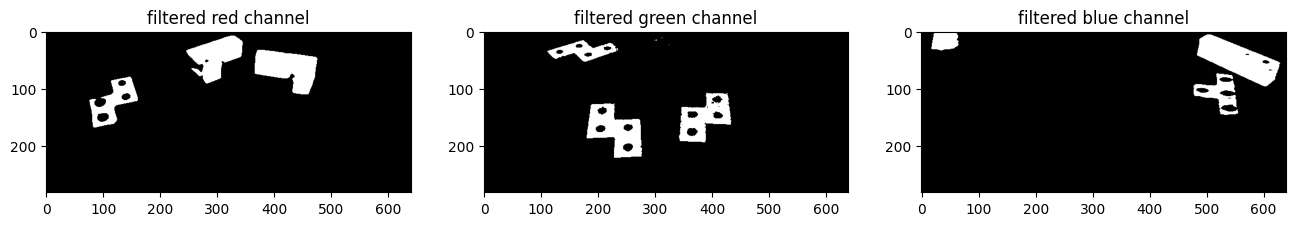

Total objects: 9


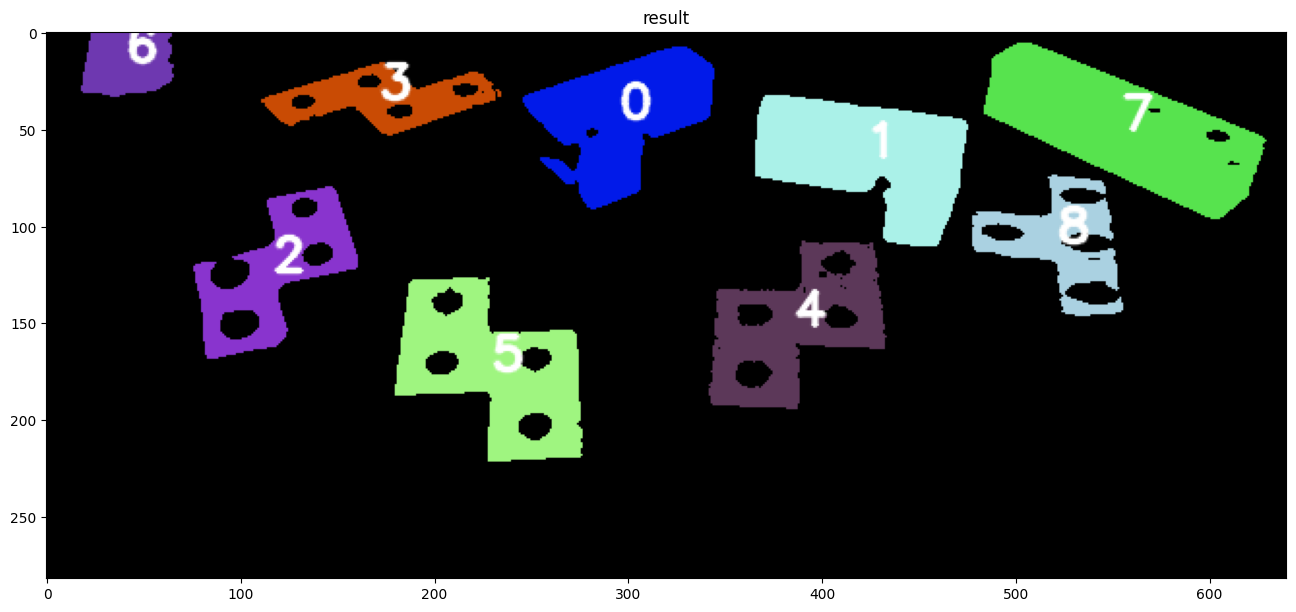

In [113]:
# copy image
img = blocks.copy()
# value for background filtering
WHITE_T=60
# min size for figure
MIN_AREA = 150
# filter background
bg = (img[...,0] >= WHITE_T) & (img[...,1] >= WHITE_T) & (img[...,2] >= WHITE_T)
img[bg] = 0

# working with channels separately gives result a bit easier
red   = img[..., 0].astype(np.uint8).copy()
green = img[..., 1].astype(np.uint8).copy()
blue  = img[..., 2].astype(np.uint8).copy()

# a bit of noise reducing functions
red = cv2.GaussianBlur(red,(15,15),0)
green = cv2.GaussianBlur(green, (3,3),0)
blue = cv2.GaussianBlur(blue, (21,3),0)

# filter colors intensity
red = (red >=150).astype(np.uint8) * 255
green = (green >= 120).astype(np.uint8) * 255
blue = (blue >= 100).astype(np.uint8) * 255

# prepare to draw
canvas = np.zeros_like(img)
rng = np.random.default_rng(0)
idx = 1
for mask in (red, green, blue):
    # get binary mask and all the stats that we need
    num, labels, stats, cents = cv2.connectedComponentsWithStats(mask, connectivity=8)
    for i in range(1, num):
        # if object is too small, don't add it
        if stats[i,4] < MIN_AREA: continue
        # make areas colorful and labeled
        color = generate_colors(1)
        canvas[labels == i] = color
        cx, cy = map(int, cents[i])
        cv2.putText(canvas, str(idx -1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255,255,255), 2, cv2.LINE_AA)
        idx += 1

# show the results
showInRow([red,green,blue],["filtered red channel", "filtered green channel", "filtered blue channel"])
print("Total objects:", idx-1)
showInRow([canvas],["result"])
